In [36]:
# Load Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [37]:
# OS setup
main_path = os.getcwd()
data_path = os.path.join(main_path, 'data')
csv_path = os.path.join(main_path, 'info.csv') # csv 파일을 저장할 위치

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [38]:
# Save empty csv
if not os.path.exists(csv_path):
    df = pd.DataFrame(columns=['state', 'gender', 'age', 'source', 'file', 'detail'])
    df.to_csv(csv_path)

In [39]:
# %run donateacry_corpus_data_trans.ipynb

In [40]:
# %run asvp-esd-data-trans.ipynb

In [41]:
# % run giulbia-data-trans.ipynb

In [42]:
# Check csv
df = pd.read_csv(csv_path, index_col=0).fillna('')

df.state = df.state.astype('category')
df.gender = df.gender.astype('category')
df.age = df.age.astype('category')
df.source = df.source.astype('category')

df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1903
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   state   1904 non-null   category
 1   gender  1904 non-null   category
 2   age     1904 non-null   category
 3   source  1904 non-null   category
 4   file    1904 non-null   object  
 5   detail  1904 non-null   object  
dtypes: category(4), object(2)
memory usage: 53.2+ KB


,state,gender,age,source,file,detail
1894,happy,,,giulbia,laugh_1.m4a_64.wav,
1895,happy,,,giulbia,laugh_1.m4a_70.wav,
1896,happy,,,giulbia,laugh_1.m4a_58.wav,
1897,happy,,,giulbia,laugh_1.m4a_9.wav,
1898,happy,,,giulbia,laugh_2.m4a_1.wav,
1899,happy,,,giulbia,laugh_2.m4a_0.wav,
1900,happy,,,giulbia,laugh_1.m4a_8.wav,
1901,happy,,,giulbia,laugh_1.m4a_59.wav,
1902,happy,,,giulbia,laugh_1.m4a_71.wav,
1903,happy,,,giulbia,laugh_1.m4a_65.wav,


state 에 따른 파일의 개수와 비율
sad        state exists in 61.97% of  1180 files.
hungry     state exists in 20.06% of   382 files.
happy      state exists in 11.45% of   218 files.
calm       state exists in 01.58% of    30 files.
tired      state exists in 01.26% of    24 files.
discomfort state exists in 01.05% of    20 files.
belly_pain state exists in 00.84% of    16 files.
fearful    state exists in 00.53% of    10 files.
burping    state exists in 00.42% of     8 files.
ch         state exists in 00.37% of     7 files.
bored      state exists in 00.32% of     6 files.
pain       state exists in 00.11% of     2 files.
disgust    state exists in 00.05% of     1 files.


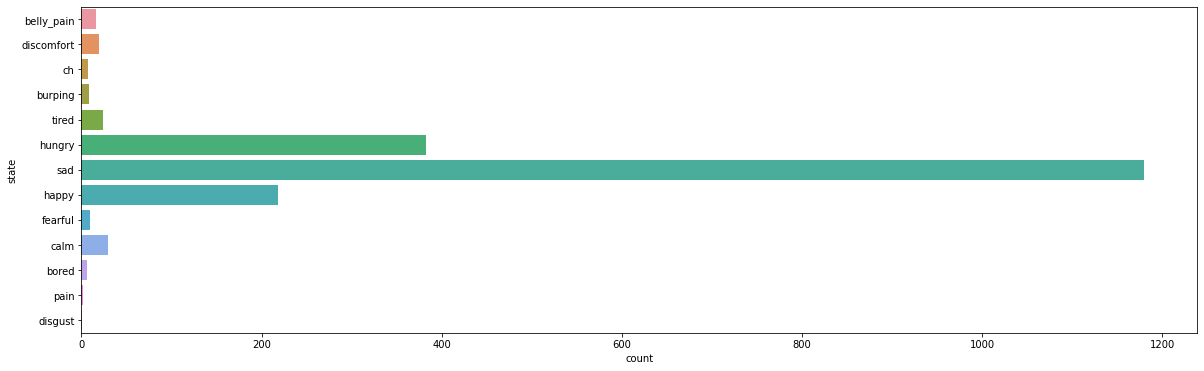

In [43]:
# 상태에 따른 파일의 개수를 알아보자.

def print_category_info(category: str, sub=None):
    print(f"{category} 에 따른 파일의 개수와 비율")
    value_counts = df[category].value_counts()
    keys = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    rates = list(df[category].value_counts(normalize=True).values)

    for i in range(len(keys)):
        print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.countplot(y=category, 
                data=df,
                order=df[category].unique(),
                hue=sub,
                dodge=False)

print_category_info('state')

source 에 따른 파일의 개수와 비율
asvp-esd   state exists in 70.33% of  1339 files.
donate_a_cry state exists in 24.00% of   457 files.
giulbia    state exists in 05.67% of   108 files.


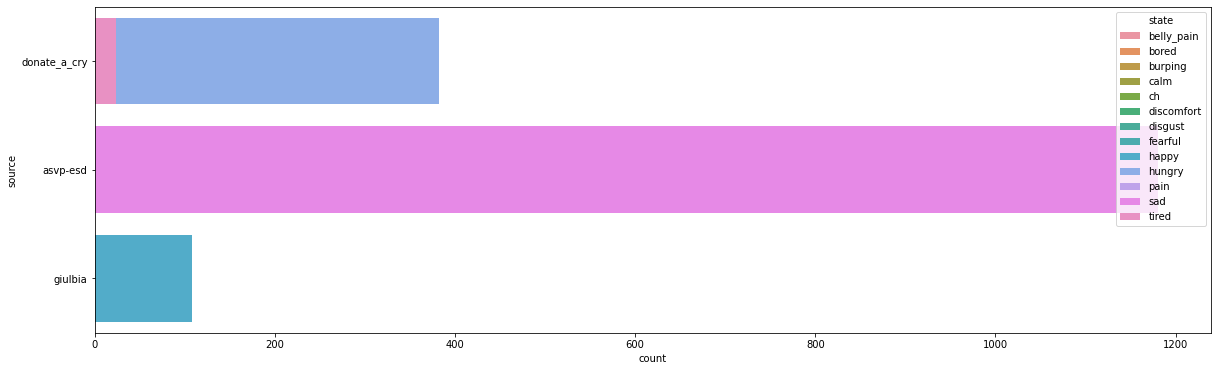

In [44]:
# 출처에 따른 파일의 개수를 알아보자.

print_category_info('source', sub='state')

NULL value counts: 108

Male exists in 84.82% of 1615 files.
Male exists in 15.18% of  289 files.


<Axes: xlabel='count', ylabel='gender'>

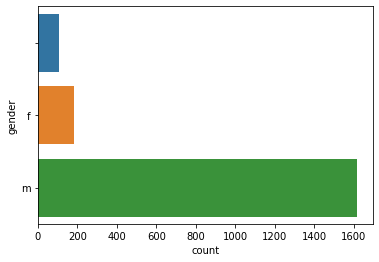

In [45]:
print(f"NULL value counts: {len(df) - (df.gender == '').value_counts().values[0]}\n") # NULL 값은 없다.

# 남성 자료가 많다.
gender_count = (df.gender == 'm').value_counts().values
gender_rate = (df.gender == 'm').value_counts(normalize=True).values
print(f"Male exists in {gender_rate[0]*100:05.2f}% of {gender_count[0]:4d} files.")
print(f"Male exists in {gender_rate[1]*100:05.2f}% of {gender_count[1]:4d} files.")

sns.countplot(y='gender',data=df)